# Overview

After having cleaned the data of Chicago crashes, we now investigate more closely the information provided for each crash. More precisely, we examine the presence of any possible relationship between the descriptors of the crashes and the variable of interest 'crash type'. 

The descriptors of the data consist of spatial and temporal information of the crashes, as well as numerous factors of the crashes: weather, road, and lighting conditions, posted speed limit, control device, road alignment, traffic-way type and causes of crashes. The 'crash type' variable divides the crashes into two types: 1-'INJURY AND / OR TOW DUE TO CRASH' and 2-'NO INJURY / DRIVE AWAY'. In the sequel and for brevity, we refer to the first crash type as 'injury' crashes and to the second crash type as 'no injury' crashes. Using this information, we are interested in examining how the weather conditions contribute to the severity of the crash, and how the road types, conditions and curvatures can affect the crash severity. Do crashes with injury occur more in high speed streets or normal streets? What driving behaviors can lead to severe crashes? Is the presence of a control device limit the occurrence of crashes? Is there any time or day or season of the year where severe crashes are more likely to occur? How are the severe crashes spread across the city of Chicago? What places are more prone to severe crashes? 

In this report, we address these questions by visualizing the data as follows:
- For each feature or descriptor, we plot how each crash type is distributed across the different categories of the feature;
- We also plot how each type of crash is changing over time;
- We finally show a map of Chicago with the locations of the two types of crashes.

# Loading the Clean Data

We here import the required modules and load the clean data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime
import geopandas
from shapely.geometry import Point

# Load the clean data
crashes = pd.read_csv('crashes.csv')

The following function is used to set the style for the bar plots.

In [2]:
def style_set(axes):
    for ax in axes:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.tick_params(axis="both",
                       which="both",
                       bottom=False,
                       top=False,
                       labelbottom=False,
                       left=False,
                       right=False)
        ax.legend(frameon=False)
    axes[1].tick_params(labelleft=False)
    axes[1].set_ylabel("")
    axes[0].yaxis.label.set_fontsize(12)

# Types of Crashes Across the Features

For each crash feature, we show how 'injury' and 'no injury' crashes are distributed across the features. More specifically, we plot the bar plot of both types of crashes across each feature. 

We examine next each feature and provide its corresponding barplot. 

## Posted Speed Limit
We first start with the posted speed limit. For each crash type, we check how the crashes are distributed across the possible values of posted speed limit.

In [3]:
# Speed and crashes with injury
# get the speed limit counts for the 'injury' crash type
speed_injury = crashes.loc[crashes.CRASH_TYPE ==
                           'INJURY AND / OR TOW DUE TO CRASH',
                           'POSTED_SPEED_LIMIT'].value_counts()
# compute the percentage for each speed limit
speed_injury_percent = 100 * speed_injury / sum(speed_injury)
speed_injury_percent = speed_injury_percent.reset_index()
speed_injury_percent.columns = ['Speed Limit', 'Percentage']

# Speed and crashes with no inury
# get the speed limit counts for the 'no injury' crash type
speed_no_injury = crashes.loc[crashes.CRASH_TYPE == 'NO INJURY / DRIVE AWAY',
                              'POSTED_SPEED_LIMIT'].value_counts()
speed_no_injury_percent = 100 * speed_no_injury / sum(speed_no_injury)
# compute the percentage for each speed limit
speed_no_injury_percent = speed_no_injury_percent.reset_index()
speed_no_injury_percent.columns = ['Speed Limit', 'Percentage']

speed_injury_percent.sort_values('Speed Limit', inplace=True)
speed_no_injury_percent.sort_values('Speed Limit', inplace=True)

Now we plot the barplot for each type of crash.

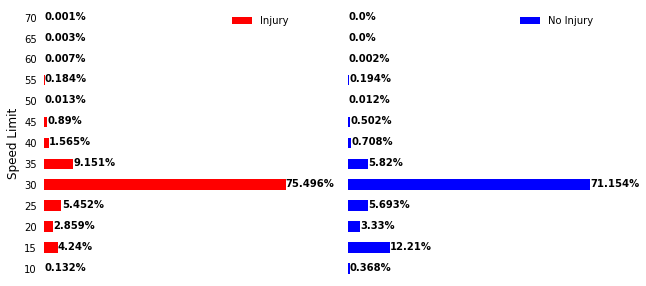

In [4]:
speed = pd.merge(speed_injury_percent,
                 speed_no_injury_percent,
                 how='outer',
                 on='Speed Limit',
                 suffixes=('_injury', '_no_injury'))
speed = speed.fillna(0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

speed.plot.barh(x="Speed Limit",
                y="Percentage_injury",
                color="red",
                ax=axes[0],
                label='Injury')
for i, v in enumerate(speed['Percentage_injury']):
    axes[0].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

speed.plot.barh(x="Speed Limit",
                y="Percentage_no_injury",
                color="b",
                ax=axes[1],
                label='No Injury')
for i, v in enumerate(speed['Percentage_no_injury']):
    axes[1].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

style_set(axes)

plt.show()

We see from the plot how most of the crashes of either type correspond to a posted speed limit of 30 MPH. This might be because most of Chicago streets have 30 MPH as speed limit. We also see that with speeds of 35, 40 and 45 MPH, their proportions out of the injury crashes are slightly higher than those of no injury crashes. On the other hand, lower speeds of 10 and 15 MPH have greater contribution to no injury crashes than to injury crashes.

## Traffic Control Device
Second, we consider the presence of traffic control device and its type for each type of crashes.

In [5]:
# Device and injury crashes
# Get the control device counts for injury crashes
device_injury = crashes.loc[crashes.CRASH_TYPE ==
                            'INJURY AND / OR TOW DUE TO CRASH',
                            'TRAFFIC_CONTROL_DEVICE'].value_counts()
device_injury_percent = 100 * device_injury / sum(device_injury)
# Compute the percentage
device_injury_percent = device_injury_percent.reset_index()
device_injury_percent.columns = ['Device', 'Percentage']

# Device and no injury crashes
# Get the control device counts for no injury crashes
device_no_injury = crashes.loc[crashes.CRASH_TYPE == 'NO INJURY / DRIVE AWAY',
                               'TRAFFIC_CONTROL_DEVICE'].value_counts()
device_no_injury_percent = 100 * device_no_injury / sum(device_no_injury)
# Compute the percentage
device_no_injury_percent = device_no_injury_percent.reset_index()
device_no_injury_percent.columns = ['Device', 'Percentage']

Now we plot the barplot for each type of crash.

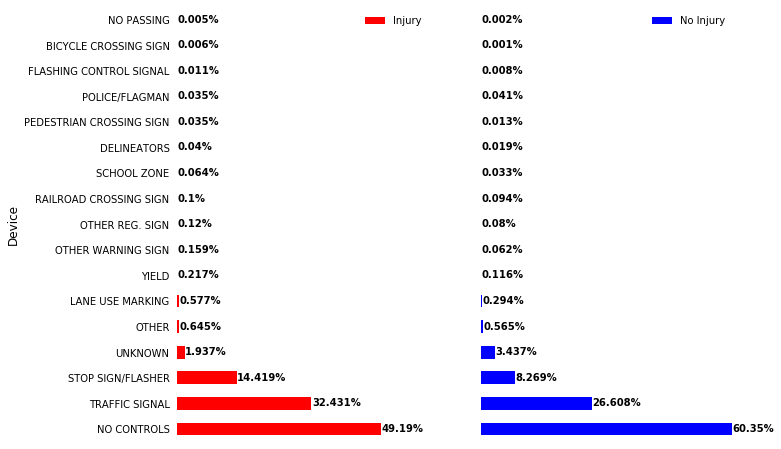

In [6]:
device = pd.merge(device_injury_percent,
                  device_no_injury_percent,
                  how='outer',
                  on='Device',
                  suffixes=('_injury', '_no_injury'))
device = device.fillna(0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

device.plot.barh(x="Device",
                 y="Percentage_injury",
                 color="r",
                 ax=axes[0],
                 label='Injury',
                 xlim=[0, 61])
for i, v in enumerate(device['Percentage_injury']):
    axes[0].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

device.plot.barh(x="Device",
                 y="Percentage_no_injury",
                 color="b",
                 ax=axes[1],
                 label='No Injury',
                 xlim=[0, 61])
for i, v in enumerate(device['Percentage_no_injury']):
    axes[1].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

style_set(axes)

plt.show()

We notice that for both types of crashes, most of the crashes happen when there was no control device. However, the proportions of the following two devices: traffic signal and the stop sign are greater with injury crashes than those of no injury crashes. This might be related to the fact that traffic signal and stop sign are present at intersection where severe crashes are more likely to occur.

## Weather Conditions
Now we consider the weather conditions for both types of crashes.

In [7]:
# Weather and injury crashes
# Get the weather conditions for injury crashes
weather_injury = crashes.loc[crashes.CRASH_TYPE ==
                             'INJURY AND / OR TOW DUE TO CRASH',
                             'WEATHER_CONDITION'].value_counts()
weather_injury_percent = 100 * weather_injury / sum(weather_injury)
# Compute the percentage
weather_injury_percent = weather_injury_percent.reset_index()
weather_injury_percent.columns = ['Weather', 'Percentage']

# Get the weather conditions for no injury crashes
weather_no_injury = crashes.loc[crashes.CRASH_TYPE == 'NO INJURY / DRIVE AWAY',
                                'WEATHER_CONDITION'].value_counts()
weather_no_injury_percent = 100 * weather_no_injury / sum(weather_no_injury)
# Compute the percentage
weather_no_injury_percent = weather_no_injury_percent.reset_index()
weather_no_injury_percent.columns = ['Weather', 'Percentage']

Now we plot the barplot for each type of crash.

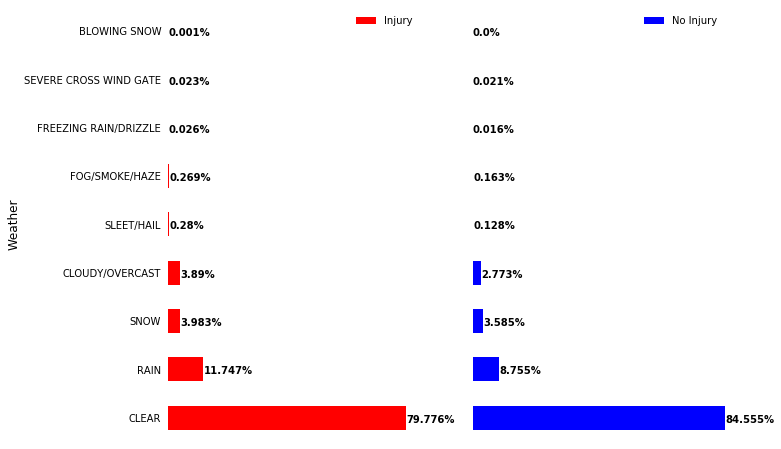

In [8]:
weather = pd.merge(weather_injury_percent,
                   weather_no_injury_percent,
                   how='outer',
                   on='Weather',
                   suffixes=('_injury', '_no_injury'))
weather_injury = weather.fillna(0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

weather.plot.barh(x="Weather",
                  y="Percentage_injury",
                  color="r",
                  ax=axes[0],
                  label='Injury',
                  xlim=[0, 85])
for i, v in enumerate(weather['Percentage_injury']):
    axes[0].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

weather.plot.barh(x="Weather",
                  y="Percentage_no_injury",
                  color="b",
                  ax=axes[1],
                  label='No Injury',
                  xlim=[0, 85])
for i, v in enumerate(weather['Percentage_no_injury']):
    axes[1].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

style_set(axes)

plt.show()

We see from the plots that most crashes, even the ones with injury, occurred when the weather was clear. This might suggest that people are more careful with their driving when the weather is not clear. However, we see that the proportions of the following weather conditions: rain, cloudy and sleet are slightly higher with injury crashes than with no injury crashes.

## Lighting Conditions
We now check the lighting conditions, which describes how lighted the road was during the crash.

In [9]:
# Lighting and injury crashes
# Get the lihgting conditions for injury crashes
lighting_injury = crashes.loc[crashes.CRASH_TYPE ==
                              'INJURY AND / OR TOW DUE TO CRASH',
                              'LIGHTING_CONDITION'].value_counts()
lighting_injury_percent = 100 * lighting_injury / sum(lighting_injury)
# Compute the percentage
lighting_injury_percent = lighting_injury_percent.reset_index()
lighting_injury_percent.columns = ['Lighting', 'Percentage']

# Lighting and no injury crashes
# Get the lihgting conditions for no injury crashes
lighting_no_injury = crashes.loc[crashes.CRASH_TYPE ==
                                 'NO INJURY / DRIVE AWAY',
                                 'LIGHTING_CONDITION'].value_counts()
lighting_no_injury_percent = 100 * lighting_no_injury / sum(lighting_no_injury)
# Compute the percentage
lighting_no_injury_percent = lighting_no_injury_percent.reset_index()
lighting_no_injury_percent.columns = ['Lighting', 'Percentage']

We now plot the lighting conditions for each catergory.

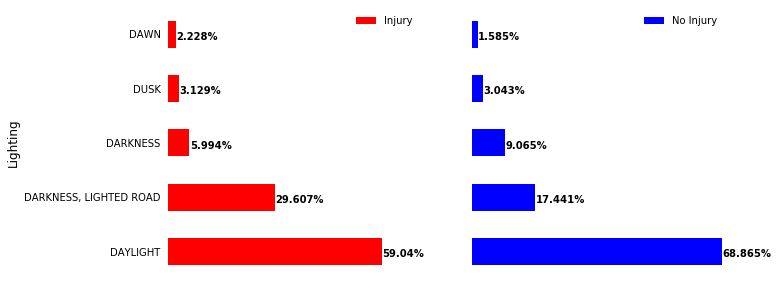

In [10]:
light = pd.merge(lighting_injury_percent,
                 lighting_no_injury_percent,
                 on='Lighting',
                 how='outer',
                 suffixes=['_injury', '_no_injury'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

light.plot.barh(x="Lighting",
                y="Percentage_injury",
                color="r",
                ax=axes[0],
                label='Injury',
                xlim=[0, 70])
for i, v in enumerate(light['Percentage_injury']):
    axes[0].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

light.plot.barh(x="Lighting",
                y="Percentage_no_injury",
                color="b",
                ax=axes[1],
                label='No Injury',
                xlim=[0, 70])
for i, v in enumerate(light['Percentage_no_injury']):
    axes[1].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

style_set(axes)
plt.show()

We see that most of the crashes happened during daylight, which is expected because most of the commute time happen during the day. However, we see that the proportions of darkness with lighted road and dawn are higher with injury crashes.  

## Road Alignment
We check the crash type with respect to the road alignment, which specifies whether the road is aligned or curved.

In [11]:
# Alignement and injury crashes
# Get the road alignement for injury crashes
alignment_injury = crashes.loc[crashes.CRASH_TYPE ==
                               'INJURY AND / OR TOW DUE TO CRASH',
                               'ALIGNMENT'].value_counts()
alignment_injury_percent = 100 * alignment_injury / sum(alignment_injury)
alignment_no_injury = crashes.loc[crashes.CRASH_TYPE ==
                                  'NO INJURY / DRIVE AWAY',
                                  'ALIGNMENT'].value_counts()
alignment_no_injury_percent = 100 * alignment_no_injury / sum(
    alignment_no_injury)

# Alignement and no injury crashes
# Get the road alignement for no injury crashes
alignment_injury_percent = alignment_injury_percent.reset_index()
alignment_injury_percent.columns = ['Alignment', 'Percentage']
alignment_no_injury_percent = alignment_no_injury_percent.reset_index()
alignment_no_injury_percent.columns = ['Alignment', 'Percentage']

We now plot the bar plot for each crash type.

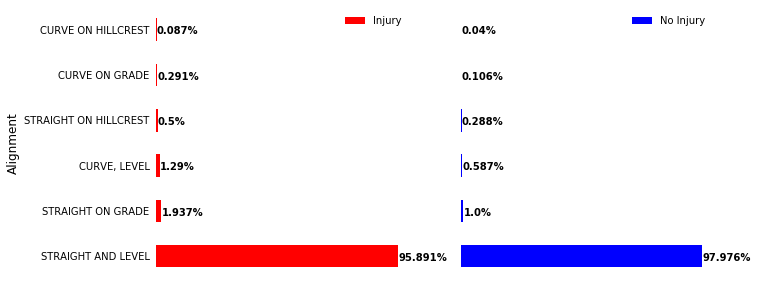

In [12]:
align = pd.merge(alignment_injury_percent,
                 alignment_no_injury_percent,
                 on='Alignment',
                 how='outer',
                 suffixes=['_injury', '_no_injury'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

align.plot.barh(x="Alignment",
                y="Percentage_injury",
                color="r",
                ax=axes[0],
                label='Injury')
for i, v in enumerate(align['Percentage_injury']):
    axes[0].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

align.plot.barh(x="Alignment",
                y="Percentage_no_injury",
                color="b",
                ax=axes[1],
                label='No Injury')
for i, v in enumerate(align['Percentage_no_injury']):
    axes[1].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

style_set(axes)
plt.show()

We notice that the majority of crashes of either type occurred on straight and level roads. However, we notice the proportions of other types of alignment of injury crashes are slightly higher than those with no injury crashes. This might be explained by the fact that most of Chicago streets are straight and level, which might suggest that his feature might not be helpful in determining the severity of a crash.

## Road Surface Conditions
We now check the road conditions for each type of crash.

In [13]:
# Road Conditions and injury crashes
# Get the road conditions for injury crashes
road_injury = crashes.loc[crashes.CRASH_TYPE ==
                          'INJURY AND / OR TOW DUE TO CRASH',
                          'ROADWAY_SURFACE_COND'].value_counts()
road_injury_percent = 100 * road_injury / sum(road_injury)
# Compute the percentage
road_injury_percent = road_injury_percent.reset_index()
road_injury_percent.columns = ['Road', 'Percentage']

# Road Conditions and no injury crashes
# Get the road injuries for no injury crashes
road_no_injury = crashes.loc[crashes.CRASH_TYPE == 'NO INJURY / DRIVE AWAY',
                             'ROADWAY_SURFACE_COND'].value_counts()
road_no_injury_percent = 100 * road_no_injury / sum(road_no_injury)
# Compute the percentage
road_no_injury_percent = road_no_injury_percent.reset_index()
road_no_injury_percent.columns = ['Road', 'Percentage']

We plot the bar plot for each crash type.

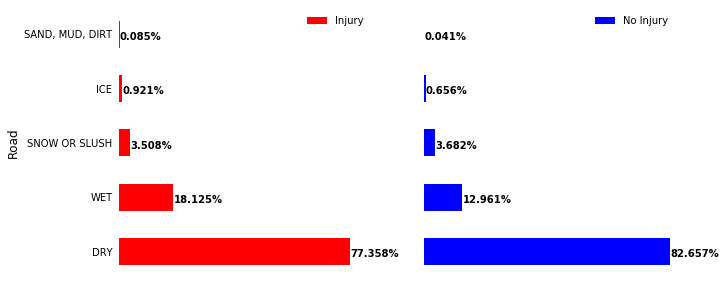

In [14]:
road = pd.merge(road_injury_percent,
                road_no_injury_percent,
                on='Road',
                how='outer',
                suffixes=['_injury', '_no_injury'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

road.plot.barh(x="Road",
               y="Percentage_injury",
               color="r",
               ax=axes[0],
               label='Injury',
               xlim=[0, 85])
for i, v in enumerate(road['Percentage_injury']):
    axes[0].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

road.plot.barh(x="Road",
               y="Percentage_no_injury",
               color="b",
               ax=axes[1],
               label='No Injury',
               xlim=[0, 85])
for i, v in enumerate(road['Percentage_no_injury']):
    axes[1].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

style_set(axes)
plt.show()

Similarly to weather conditions, we also notice here that most of the crashes happened on dry surface roads. However, the proportions of the following two conditions: wet and ice are higher with injury crashes.

## First Collision Type
This feature specifies the type of collision that happened whether it was from the side or from the rear, etc. We now examine the crash type with respect to the collision type.

In [15]:
# Collision typse and injury crashes
# Get the collision types for injury crashes
colli_injury = crashes.loc[crashes.CRASH_TYPE ==
                           'INJURY AND / OR TOW DUE TO CRASH',
                           'FIRST_CRASH_TYPE'].value_counts()
colli_injury_percent = 100 * colli_injury / sum(colli_injury)
# Compute the percentage
colli_injury_percent = colli_injury_percent.reset_index()
colli_injury_percent.columns = ['Collision', 'Percentage']

# Collision types and no injury crashes
# Get the collision types for no injury crashes
colli_no_injury = crashes.loc[crashes.CRASH_TYPE == 'NO INJURY / DRIVE AWAY',
                              'FIRST_CRASH_TYPE'].value_counts()
colli_no_injury_percent = 100 * colli_no_injury / sum(colli_no_injury)
# Compute the percentage
colli_no_injury_percent = colli_no_injury_percent.reset_index()
colli_no_injury_percent.columns = ['Collision', 'Percentage']

We now plot the barplot for each crash type.

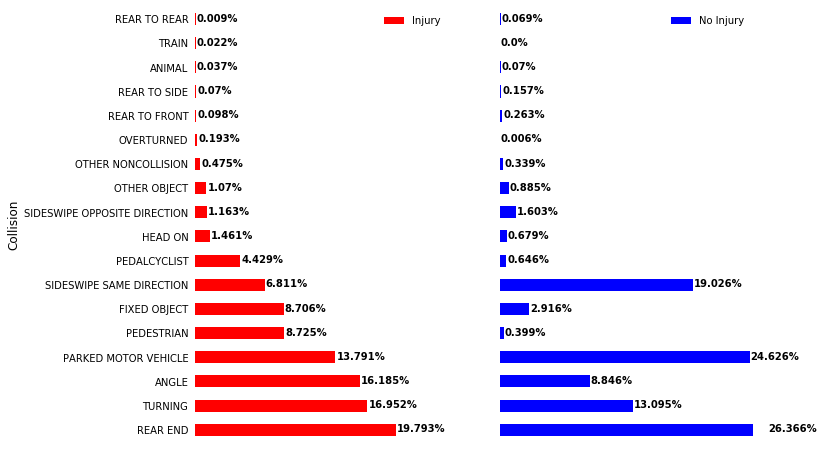

In [16]:
collision = pd.merge(colli_injury_percent,
                     colli_no_injury_percent,
                     on='Collision',
                     how='outer',
                     suffixes=['_injury', '_no_injury'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

collision.plot.barh(x="Collision",
                    y="Percentage_injury",
                    color="r",
                    ax=axes[0],
                    label='Injury',
                    xlim=[0, 25])
for i, v in enumerate(collision['Percentage_injury']):
    axes[0].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

collision.plot.barh(x="Collision",
                    y="Percentage_no_injury",
                    color="b",
                    ax=axes[1],
                    label='No Injury',
                    xlim=[0, 25])
for i, v in enumerate(collision['Percentage_no_injury']):
    axes[1].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

style_set(axes)
plt.show()

We immediately notice for this feature, the difference in distribution of each crash type. In particular, we notice how turning, angle collision and collision with pedestrian or pedalcyclist or fixed object contribute more to crashes with injury. On the other hand, sideswipe collision and accidents with parked motor vehicle contribute less to crashes with injury.

## Trafficway Type
We now check the trafficway type for each crash type. The trafficway type describes the location of the crash. 

In [17]:
# Trafficway type and injury crashes
# Get the trafficway type for injury crashes
trway_injury = crashes.loc[crashes.CRASH_TYPE ==
                           'INJURY AND / OR TOW DUE TO CRASH',
                           'TRAFFICWAY_TYPE'].value_counts()
trway_injury_percent = 100 * trway_injury / sum(trway_injury)
# Compute the percentage
trway_injury_percent = trway_injury_percent.reset_index()
trway_injury_percent.columns = ['Trafficway', 'Percentage']

# Trafficway types and no injury crashes
# Get the trafficway types for no injury crashes
trway_no_injury = crashes.loc[crashes.CRASH_TYPE == 'NO INJURY / DRIVE AWAY',
                              'TRAFFICWAY_TYPE'].value_counts()
trway_no_injury_percent = 100 * trway_no_injury / sum(trway_no_injury)
# Compute the percentage
trway_no_injury_percent = trway_no_injury_percent.reset_index()
trway_no_injury_percent.columns = ['Trafficway', 'Percentage']

We now plot each crash type across the types of trafficway.

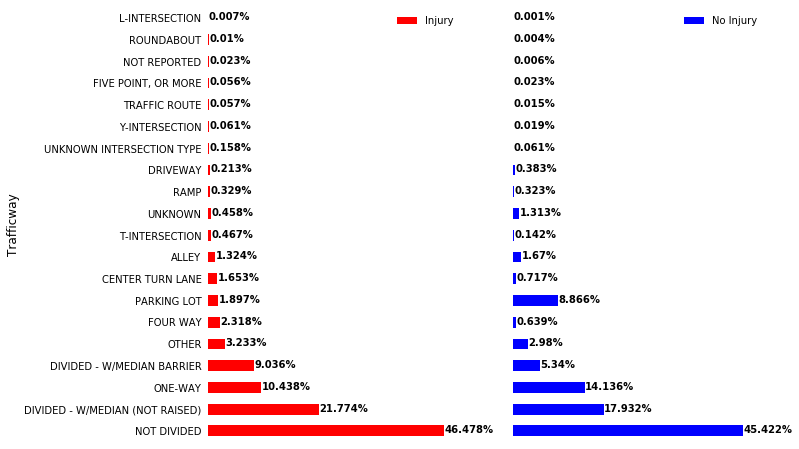

In [18]:
trafficway = pd.merge(trway_injury_percent,
                      trway_no_injury_percent,
                      on='Trafficway',
                      how='outer',
                      suffixes=['_injury', '_no_injury'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

trafficway.plot.barh(x="Trafficway",
                     y="Percentage_injury",
                     color="r",
                     ax=axes[0],
                     label='Injury',
                     xlim=[0, 50])
for i, v in enumerate(trafficway['Percentage_injury']):
    axes[0].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

trafficway.plot.barh(x="Trafficway",
                     y="Percentage_no_injury",
                     color="b",
                     ax=axes[1],
                     label='No Injury',
                     xlim=[0, 50])
for i, v in enumerate(trafficway['Percentage_no_injury']):
    axes[1].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

style_set(axes)
plt.show()

While most of the crashes occurred in non divided road, we see higher proportions for divided roads, four way and center turn lane with injury crashes than with no injury crashes. Moreover, we notice that parking lot collisions contribute less to injury crashes. 

## Contributory Causes
This feature describes the contributory cause of the crashes which includes driving behaviors or external conditions.

In [19]:
# get the causes of the injury crashes
cause_injury = crashes.loc[crashes.CRASH_TYPE ==
                           'INJURY AND / OR TOW DUE TO CRASH',
                           'PRIM_CONTRIBUTORY_CAUSE'].value_counts()
cause_injury_percent = 100 * cause_injury / sum(cause_injury)
cause_injury_percent = cause_injury_percent.reset_index()
cause_injury_percent.columns = ['Cause', 'Percentage']

# get the causes of the no injury crashes
cause_no_injury = crashes.loc[crashes.CRASH_TYPE == 'NO INJURY / DRIVE AWAY',
                              'PRIM_CONTRIBUTORY_CAUSE'].value_counts()
cause_no_injury_percent = 100 * cause_no_injury / sum(cause_no_injury)
cause_no_injury_percent = cause_no_injury_percent.reset_index()
cause_no_injury_percent.columns = ['Cause', 'Percentage']

We now plot the barplot for each crash type

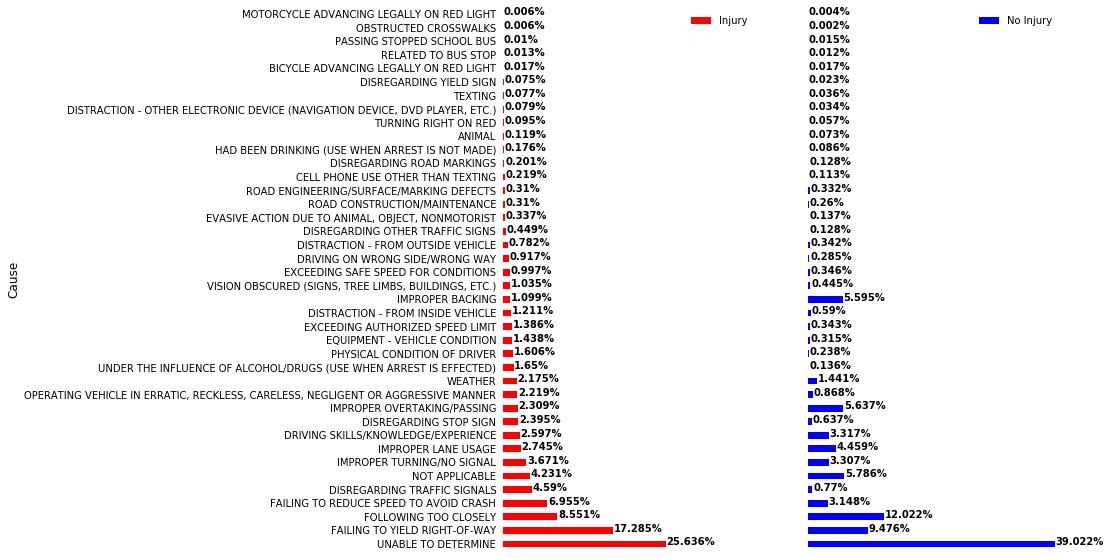

In [20]:
cause = pd.merge(cause_injury_percent,
                 cause_no_injury_percent,
                 on='Cause',
                 how='outer',
                 suffixes=['_injury', '_no_injury'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

cause.plot.barh(x="Cause",
                y="Percentage_injury",
                color="r",
                ax=axes[0],
                label='Injury',
                xlim=[0, 40])
for i, v in enumerate(cause['Percentage_injury']):
    axes[0].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

cause.plot.barh(x="Cause",
                y="Percentage_no_injury",
                color="b",
                ax=axes[1],
                label='No Injury',
                xlim=[0, 40])
for i, v in enumerate(cause['Percentage_no_injury']):
    axes[1].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

style_set(axes)
plt.show()

We notice how the following causes: failing to yield the right of way, failing to reduce speed, and disregarding traffic signals or stop sign contribute more to injury crashes. On the other hand, improper backing and overtaking or following too closely contribute less to crashes with injury.

# Change of Crashes Across Time

In this section, we plot how the number of each type of crashes is changing from month to month over the years, by counting the number of crashes that happened during each month. This is in order to examine the presence of any trend.

In [21]:
# Count the number of crashes of each month
crashes.CRASH_DATE = pd.to_datetime(crashes.CRASH_DATE)
crashes["CRASH_MY"] = crashes.CRASH_DATE.apply(
    lambda x: pd.to_datetime(str(datetime.date(x.year, x.month, 1))))
trend = crashes.groupby(["CRASH_MY"]).CRASH_TYPE.value_counts()
trend = trend.unstack().fillna(0)

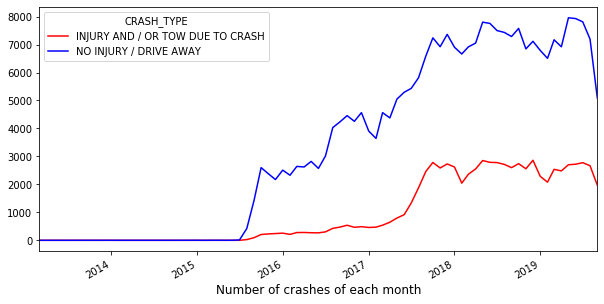

In [22]:
# Plot the time series
trend.plot(figsize=(10, 5), color=['red', 'blue'])
plt.xlabel('Number of crashes of each month', fontsize=12)
plt.show()

We see that starting from to 2017, the number of crashes reported increased this is because data from E-Crash are available for some police districts in 2015, but citywide data are not available until September 2017 (according to the website of Chicago city). We now plot the change in number of crashes starting from September 2017 till August 2019.

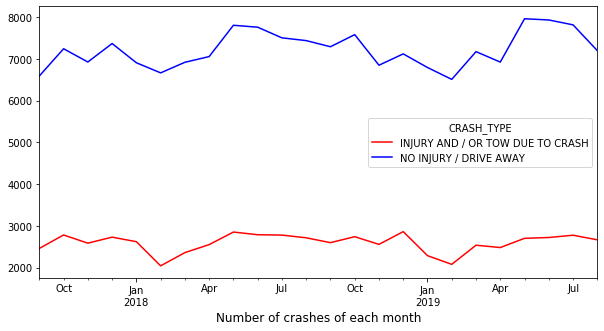

In [23]:
# Plot the time series
t = trend.loc['2017-09':'2019-08', :]
t.plot(figsize=(10, 5), color=['red', 'blue'])
plt.xlabel('Number of crashes of each month', fontsize=12)
plt.show()

Both types of crashes exhibit similar behavior across the months. Interestingly, both types of crashes decrease in February and then increase again during summer. Since both types of crashes change similarly across time, the month of the crash might not be a good predictor for the crash severity.

## Crash Hour
After checking how the number of crashes across the month of the years, we now examine how each crash type is distributed across the hours of the day. 

In [24]:
# Get the hours for injury crashes
hour_injury = crashes.loc[crashes.CRASH_TYPE ==
                          'INJURY AND / OR TOW DUE TO CRASH',
                          'CRASH_HOUR'].value_counts()
hour_injury_percent = 100 * hour_injury / sum(hour_injury)
hour_injury_percent = hour_injury_percent.reset_index()
hour_injury_percent.columns = ['Hour', 'Percentage']

# Get the hours for no injury crashes
hour_no_injury = crashes.loc[crashes.CRASH_TYPE == 'NO INJURY / DRIVE AWAY',
                             'CRASH_HOUR'].value_counts()
hour_no_injury_percent = 100 * hour_no_injury / sum(hour_no_injury)
hour_no_injury_percent = hour_no_injury_percent.reset_index()
hour_no_injury_percent.columns = ['Hour', 'Percentage']

hour_injury_percent.sort_values('Hour', inplace=True)
hour_no_injury_percent.sort_values('Hour', inplace=True)

We now plot the barplots for each crash type.

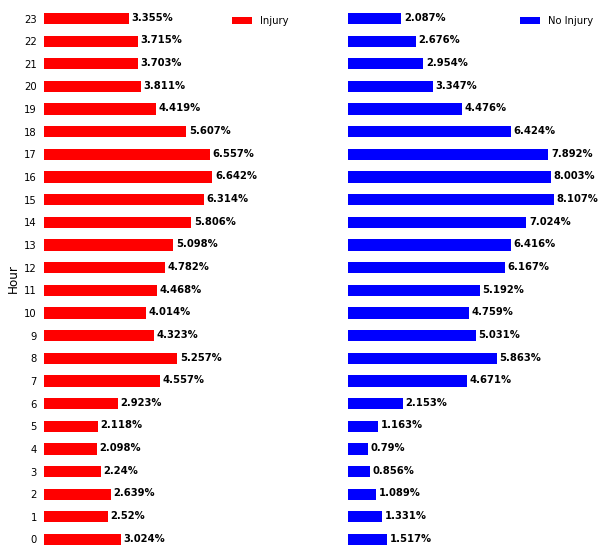

In [25]:
hour = pd.merge(hour_injury_percent,
                hour_no_injury_percent,
                on='Hour',
                how='outer',
                suffixes=['_injury', '_no_injury'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

hour.plot.barh(x="Hour",
               y="Percentage_injury",
               color="r",
               ax=axes[0],
               label='Injury',
               xlim=[0, 10])
for i, v in enumerate(hour['Percentage_injury']):
    axes[0].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

hour.plot.barh(x="Hour",
               y="Percentage_no_injury",
               color="b",
               ax=axes[1],
               label='No Injury',
               xlim=[0, 10])
for i, v in enumerate(hour['Percentage_no_injury']):
    axes[1].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

style_set(axes)
plt.show()

We notice that late night hours and early morning hours contribute more to crashes with injuries.

## Crash Day

We now check the crash day of each crash type.

In [26]:
# Get the days of injury crashes
day_injury = crashes.loc[crashes.CRASH_TYPE ==
                         'INJURY AND / OR TOW DUE TO CRASH',
                         'CRASH_DAY_OF_WEEK'].value_counts()
day_injury_percent = 100 * day_injury / sum(day_injury)
day_injury_percent = day_injury_percent.reset_index()
day_injury_percent.columns = ['Day', 'Percentage']

# Get the days of no injury crashes
day_no_injury = crashes.loc[crashes.CRASH_TYPE == 'NO INJURY / DRIVE AWAY',
                            'CRASH_DAY_OF_WEEK'].value_counts()
day_no_injury_percent = 100 * day_no_injury / sum(day_no_injury)
day_no_injury_percent = day_no_injury_percent.reset_index()
day_no_injury_percent.columns = ['Day', 'Percentage']

day_injury_percent.sort_values('Day', inplace=True)
day_no_injury_percent.sort_values('Day', inplace=True)

We now plot the  barplot of each crash type.

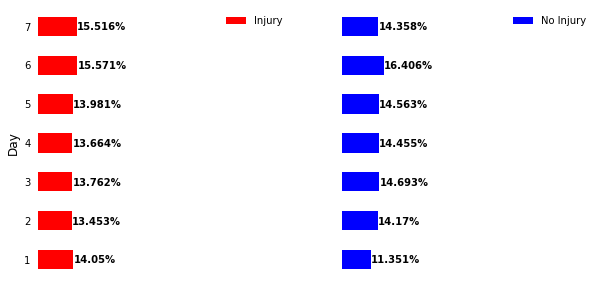

In [27]:
day = pd.merge(day_injury_percent,
               day_no_injury_percent,
               on='Day',
               how='outer',
               suffixes=['_injury', '_no_injury'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

day.plot.barh(x="Day",
              y="Percentage_injury",
              color="r",
              ax=axes[0],
              label='Injury',
              xlim=[0, 100])
for i, v in enumerate(day['Percentage_injury']):
    axes[0].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

day.plot.barh(x="Day",
              y="Percentage_no_injury",
              color="b",
              ax=axes[1],
              label='No Injury',
              xlim=[0, 100])
for i, v in enumerate(day['Percentage_no_injury']):
    axes[1].text(v + 0.1,
                 i - 0.1,
                 str((v * 1000 // 1) / 1000) + '%',
                 color='black',
                 fontweight='bold')

style_set(axes)

plt.show()

We see here that both types of crashes occurred slightly equally across the days of the week.

# Crashes on Chicago Map

In this section, we plot a map of Chicago and locate on it the locations where the injury and no injury crashes occured. We first downloaded the geojson file of Chicago city boundaries from this [website](https://www.chicago.gov/city/en/depts/doit/dataset/boundaries_-_city.html).  Using geopandas module, we create a dataframe that reprsents the boundaries of Chicago city. 

In [28]:
 df = geopandas.read_file('chicago.geojson')

We now create the points for the injury and no injury crashes using their latitude and logitude information.

In [29]:
# Get the latitude and longitude of each crash type
pt_no_injury = crashes.loc[crashes.
                           CRASH_TYPE != 'INJURY AND / OR TOW DUE TO CRASH',
                           ['LATITUDE', 'LONGITUDE']]
pt_injury = crashes.loc[crashes.CRASH_TYPE ==
                        'INJURY AND / OR TOW DUE TO CRASH',
                        ['LATITUDE', 'LONGITUDE']]

In [30]:
# Create the points from the latitude and longitude information
gdf_injury = geopandas.GeoDataFrame(
    pt_injury,
    geometry=[
        Point(xy) for xy in zip(pt_injury['LONGITUDE'], pt_injury['LATITUDE'])
    ])
gdf_no_injury = geopandas.GeoDataFrame(
    pt_no_injury,
    geometry=[
        Point(xy)
        for xy in zip(pt_no_injury['LONGITUDE'], pt_no_injury['LATITUDE'])
    ])

We now plot the locations of no injury crashes on the map of Chicago.

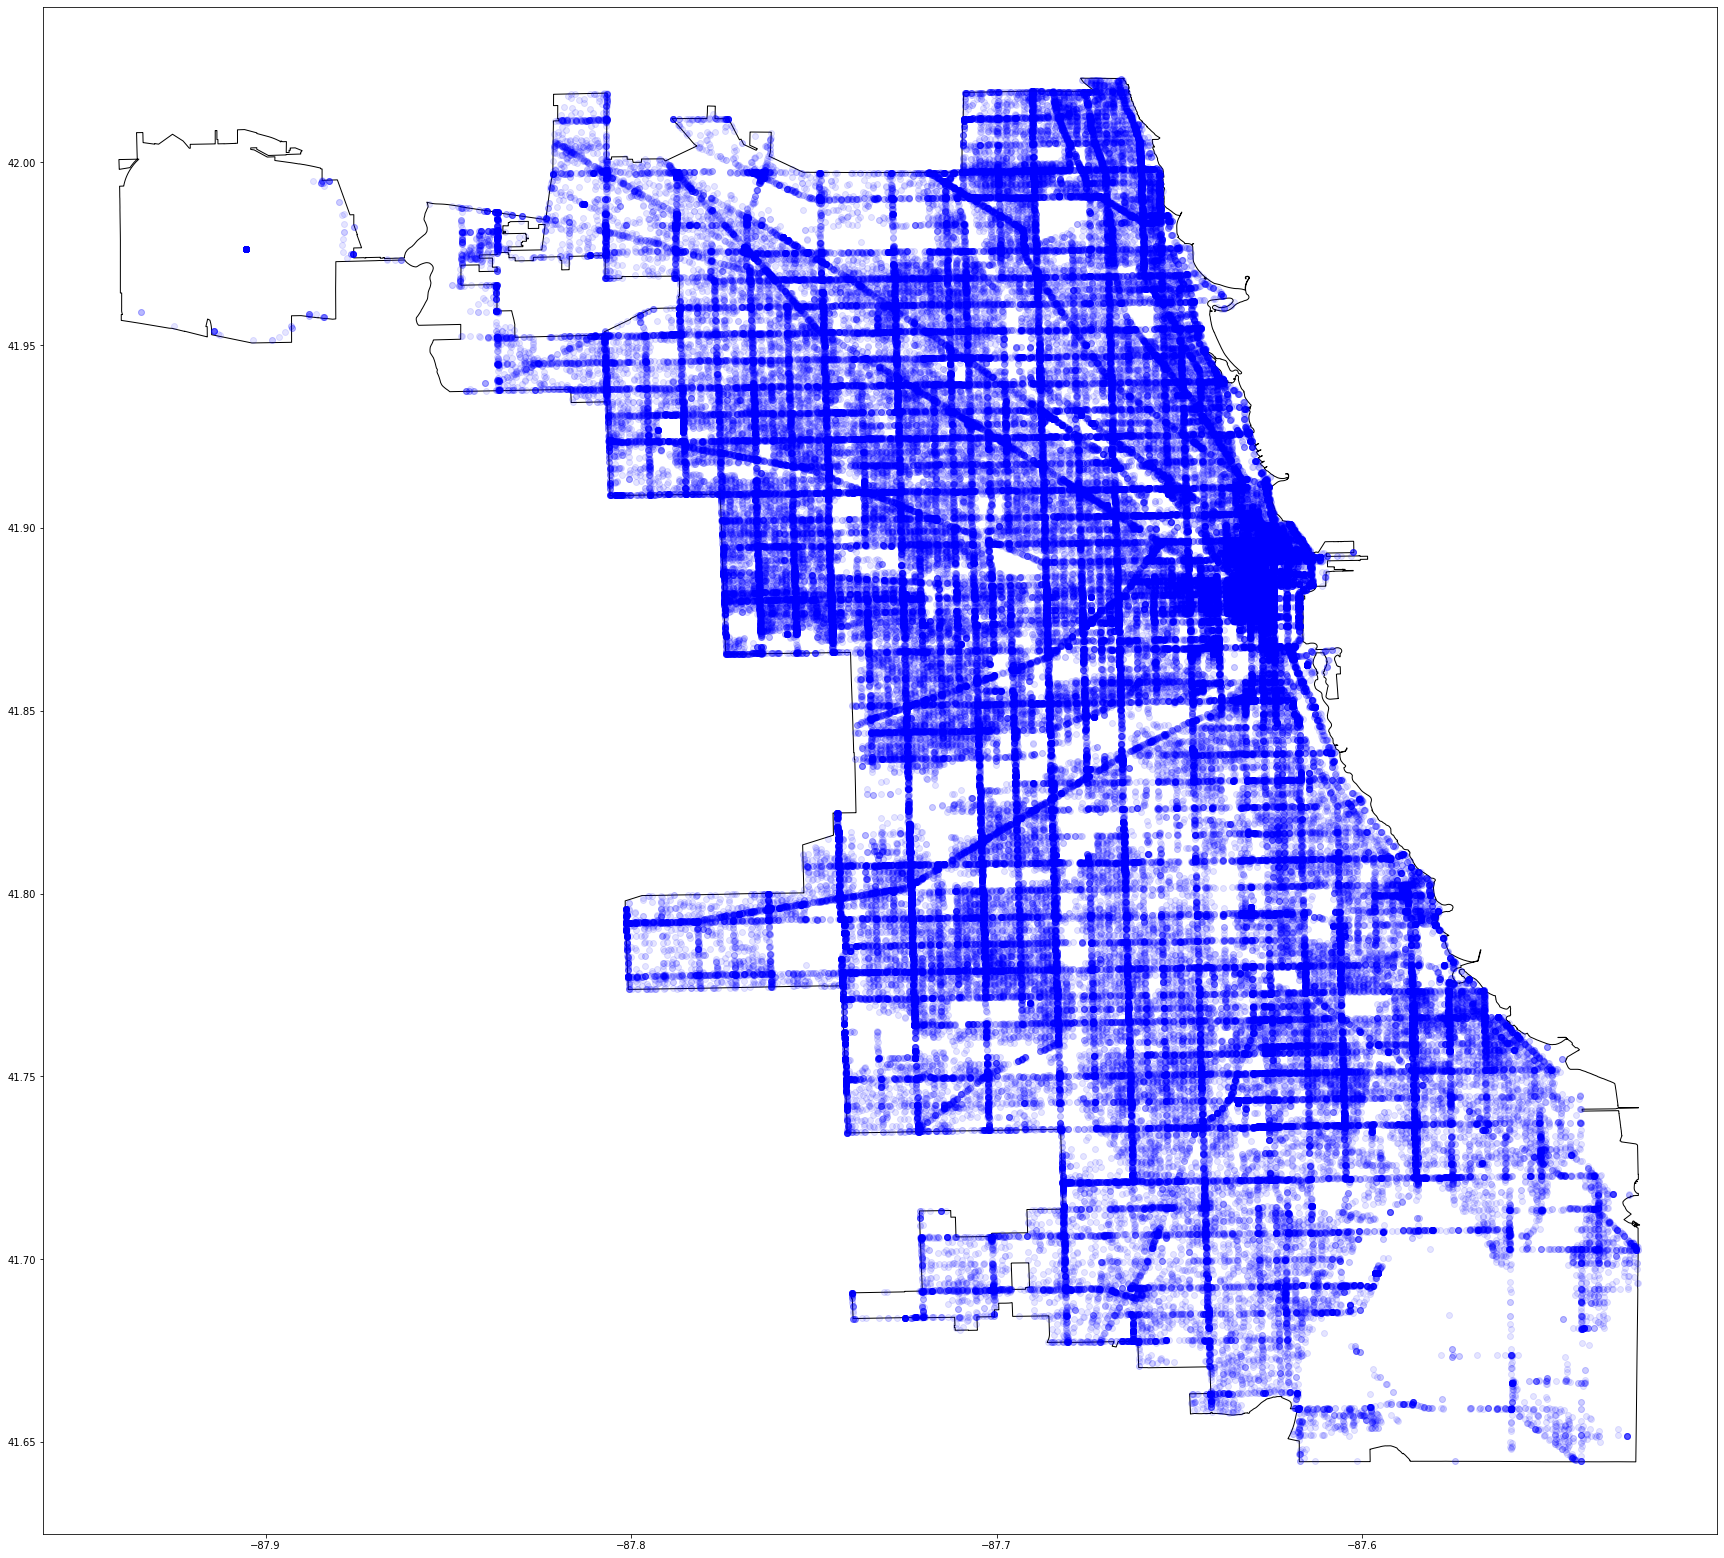

In [31]:
ax = df.plot(figsize=(30, 30), color='white', edgecolor='black')

gdf_no_injury = gdf_no_injury[(gdf_no_injury.LATITUDE.notnull())
                              & (gdf_no_injury.LONGITUDE.notnull())]
gdf_no_injury = gdf_no_injury[(gdf_no_injury.LATITUDE != 0)
                              & (gdf_no_injury.LONGITUDE != 0)]

gdf_no_injury.plot(ax=ax, color='blue', alpha=0.1)

plt.show()

We now plot the locations of no injury crashes on the map of Chicago.

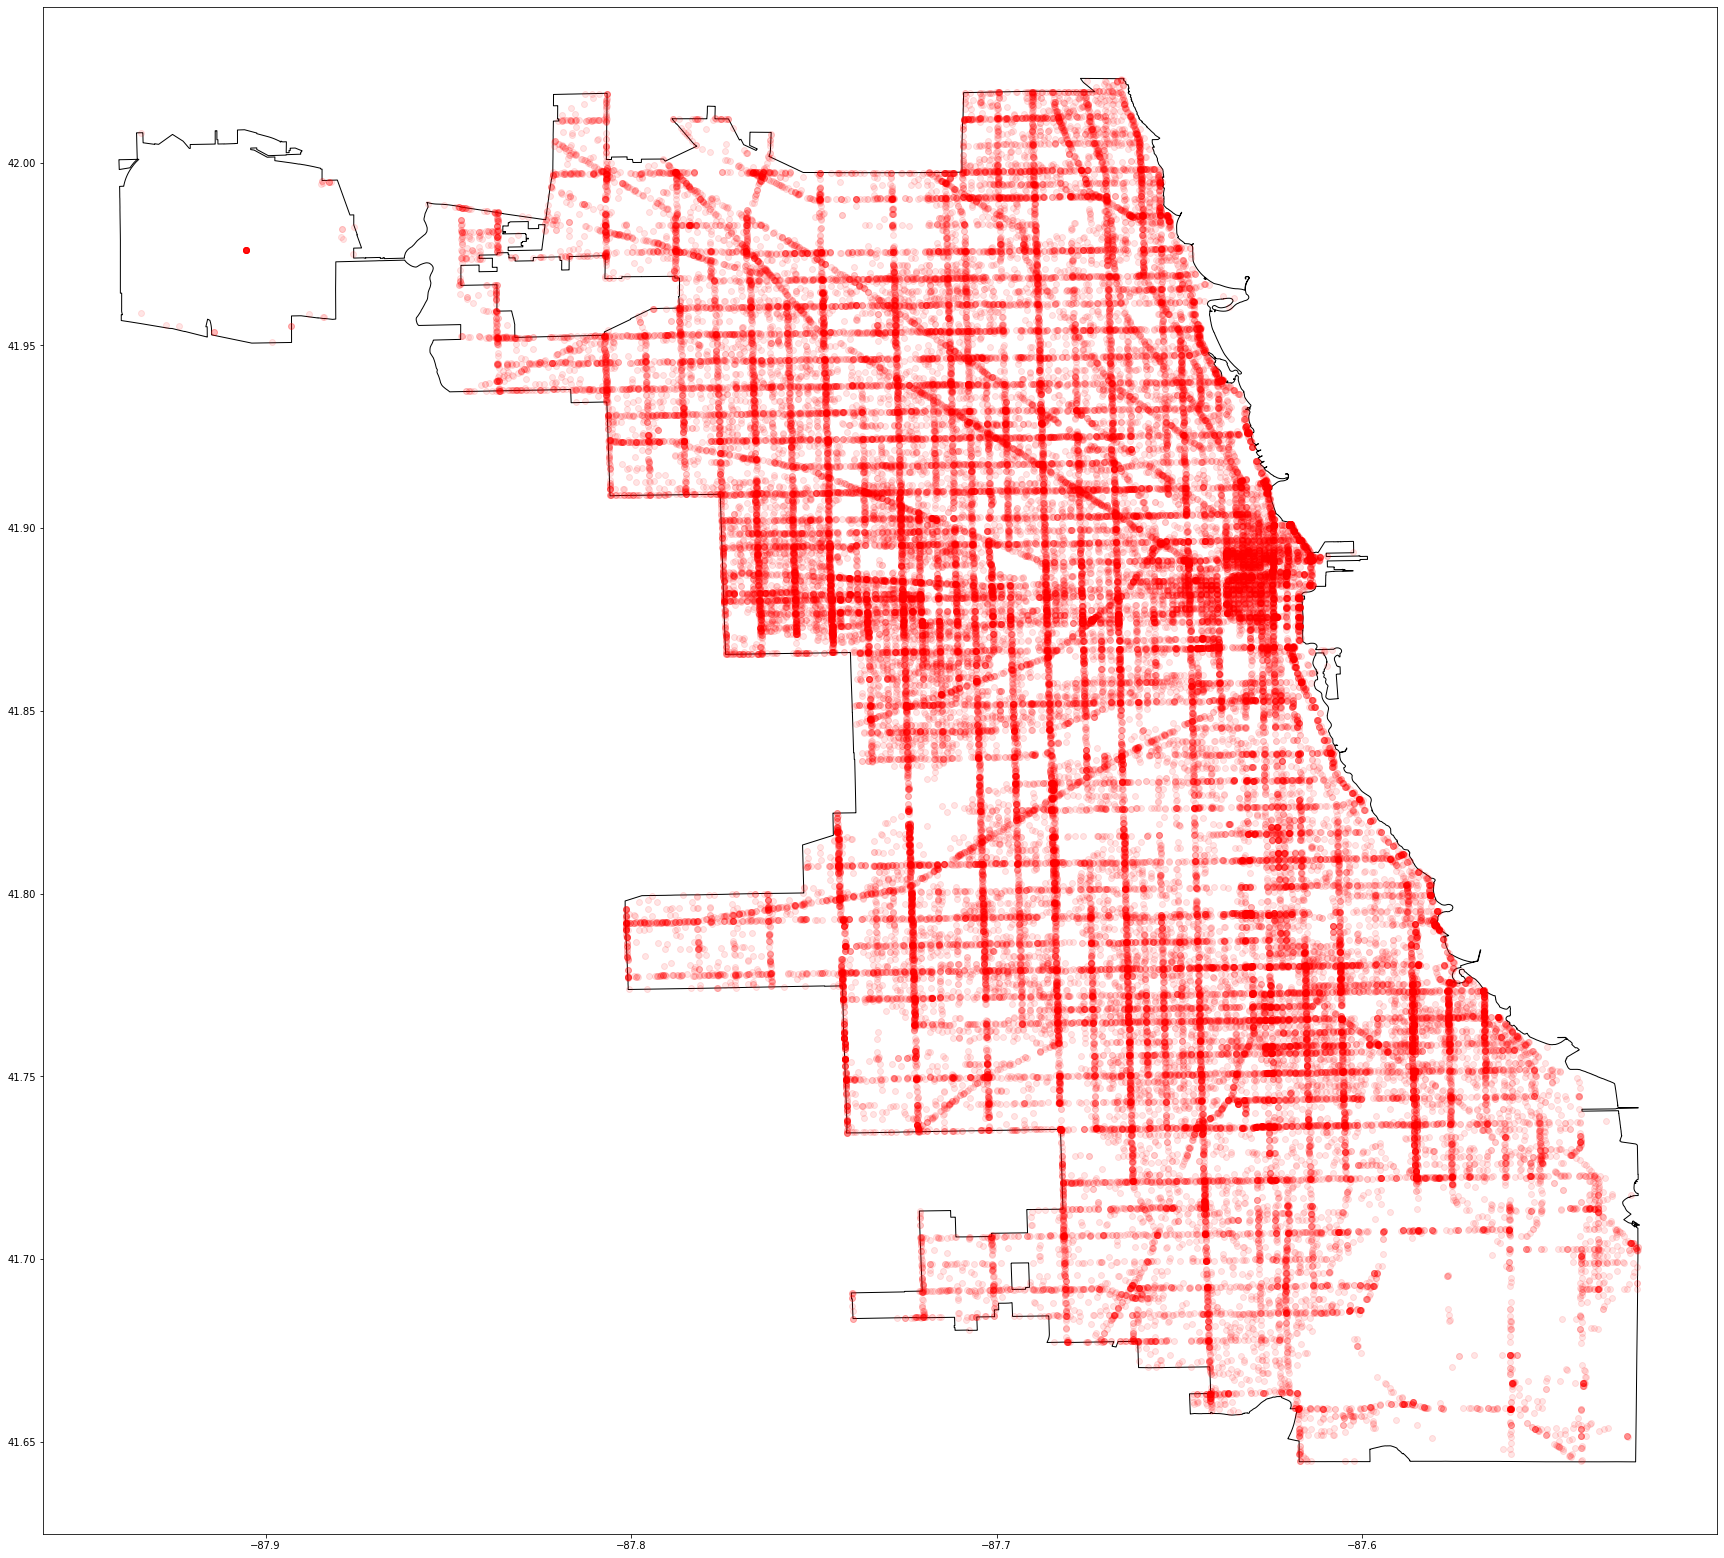

In [32]:
ax = df.plot(figsize=(30, 30), color='white', edgecolor='black')

gdf_injury = gdf_injury[(gdf_injury.LATITUDE.notnull())
                        & (gdf_injury.LONGITUDE.notnull())]
gdf_injury = gdf_injury[(gdf_injury.LATITUDE != 0)
                        & (gdf_injury.LONGITUDE != 0)]

gdf_injury.plot(ax=ax, color='red', alpha=0.1)

plt.show()

From the two maps, we see that for both types of crashes, many of them were focused in the downtown area of Chicago. The maps here did not help with providing better insights regarding the locations of severe crashes. This suggests that we might need other means for location analysis of the crashes.